B01DGIKAY8.csv Accuracy score:  96.55172413793103
B016UZ7GGE.csv Accuracy score:  81.15384615384616
B089VX66V4.csv Accuracy score:  85.89211618257261
B07T8CN8WZ.csv Accuracy score:  78.30882352941177
B09B1BZMNV.csv Accuracy score:  77.41935483870968


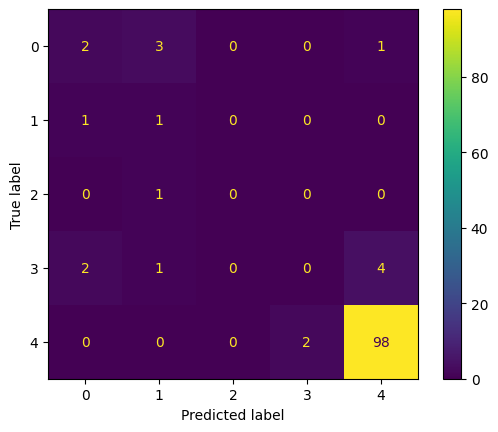

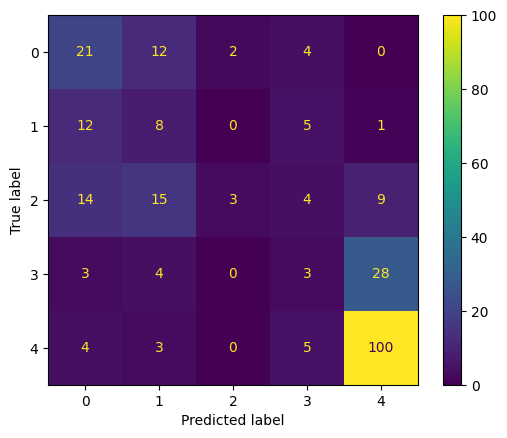

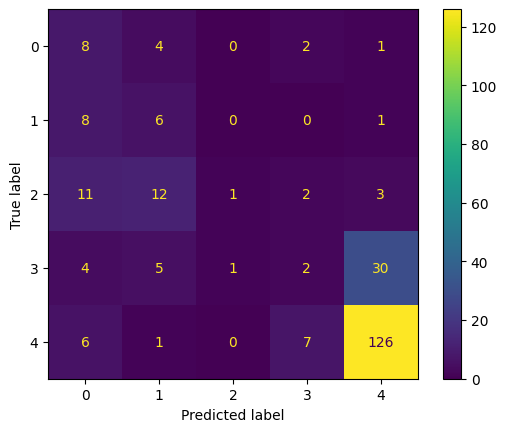

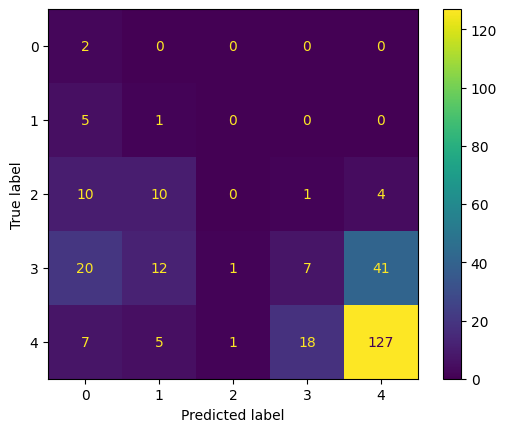

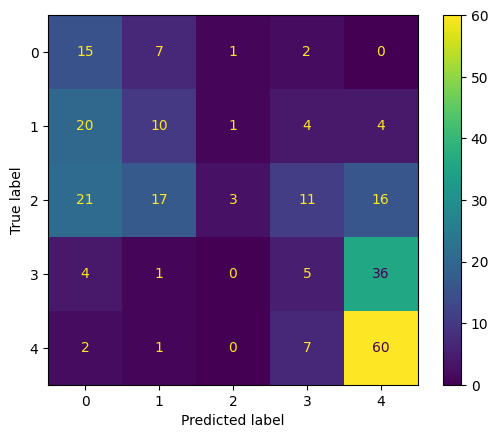

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd


csvs = [item.name for item in Path("..").glob("*.csv")]

pd.set_option("max_colwidth", 1000)

for csv_path in csvs:
    df = pd.read_csv(f"../{csv_path}")

    y_pred = list(map(round, df["rating"].to_list()))
    y_true = list(map(round, df["overall"].to_list()))

    def accuracy_metric(actual, predicted):
        correct = 0
        for i in range(len(actual)):
            if actual[i] in (predicted[i] - 1, predicted[i], predicted[i] + 1):
                correct += 1
        return correct / float(len(actual)) * 100.0

    print(csv_path, "Accuracy score: ", accuracy_metric(y_true, y_pred))

    confusion = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
    confusion.plot()
    plt.savefig(f"{csv_path}.png")

